Name - Goutham Selvakumar

Course Name - Neural Networks and Deep Learning

Course No - CSC 578

Final Class Project (A) Time Series Kaggle

    Goal:-
        Applying Deep Learning to do time series forecasting where the Recurrent Neural Networks (RNNs) are created in order to predict the future traffic volume at a location in Minnesota, between Minneapolis and St Paul.

In [1]:
#Importing the necessary packages and running it
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras 
from keras import layers 

In [2]:
#Reading the CSV file and running it 
Metro_Inter =pd.read_csv('C:/Users/admin/Desktop/Metro_Interstate_reduced.csv')

Exploratory Data Analysis:
1. Preprocessing the Data

In [3]:
#Checking the data
print('The Shape of the dataset:', Metro_Inter.shape, '\n') #the shape of the data is printed
Metro_Inter.head() #first five rows of the data are displayed

The Shape of the dataset: (40575, 9) 



,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
Metro_Inter.tail() #last five of the data are displayed

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
40570,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
40571,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
40572,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
40573,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
40574,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


From the above tables, we can come to a conclusion that there are 5 numerical variables, 3 categorical variables, 1 ordinal variable is present with the target variable as the 'traffic_volume'.

2. Visualizing the Data

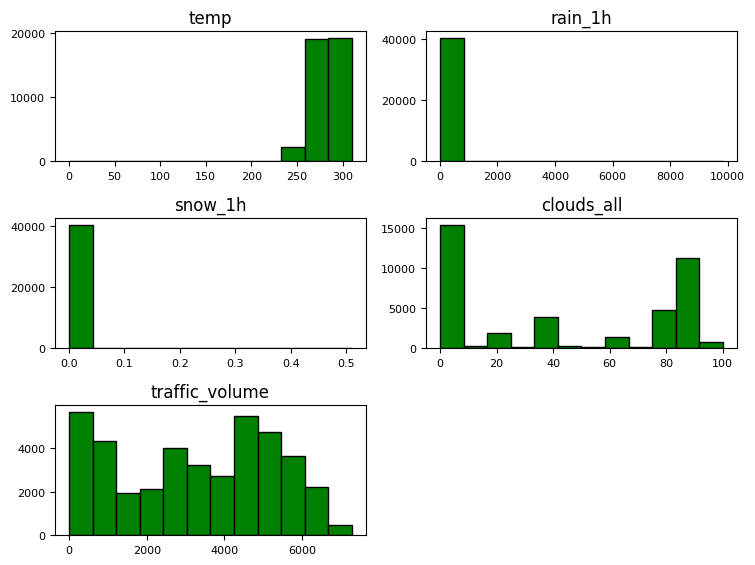

In [5]:
#The data is visualized using the histogram
Metro_Inter.hist(bins=12, color='green', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False) 
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) #Plotting the histogram

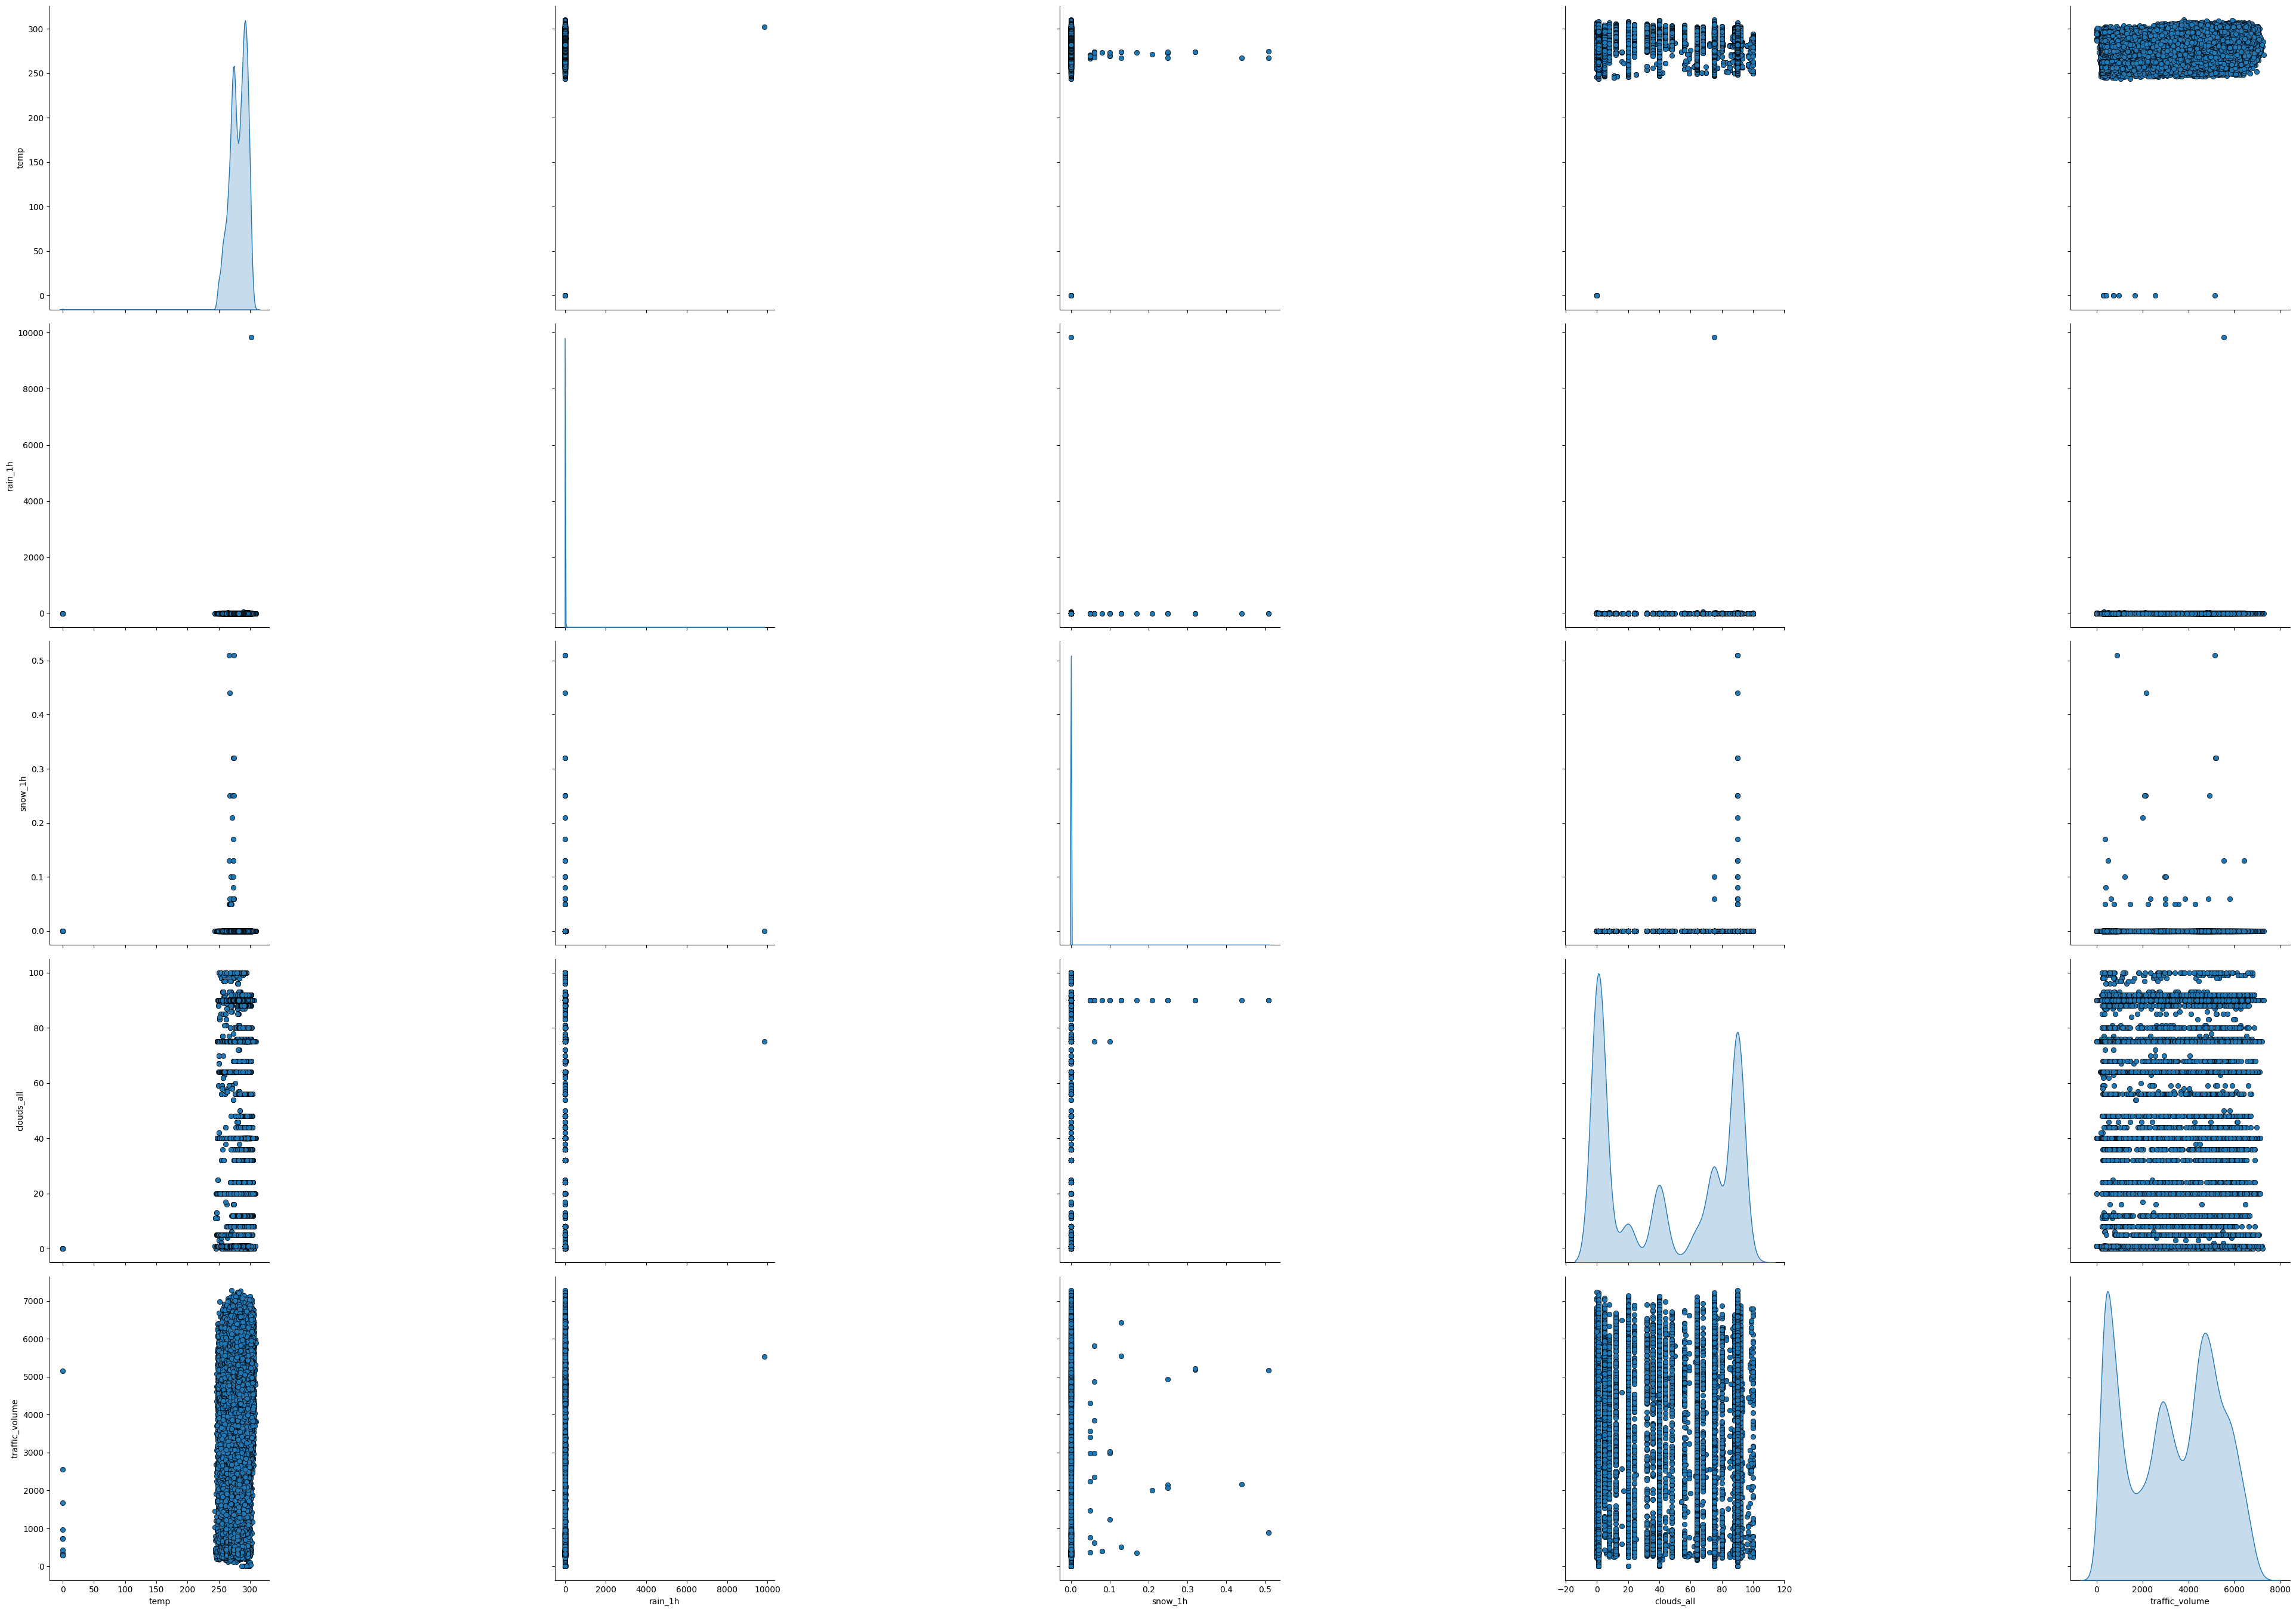

In [6]:
corr_plot = sns.pairplot(Metro_Inter, size=2.8, aspect=2.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(fill=True))
fig = corr_plot.fig 
fig.subplots_adjust(top=1.93, wspace=1.3)
plt.show() #the correlation is plotted 

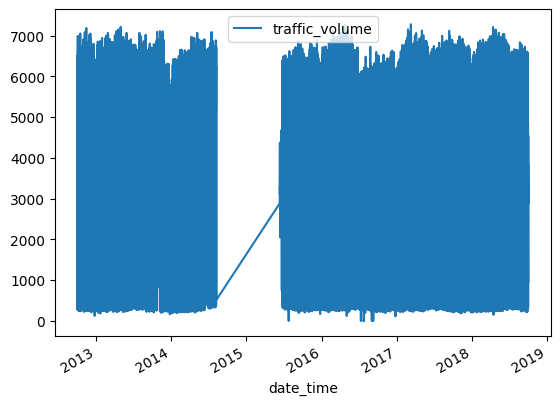

In [7]:
data_viz = Metro_Inter.copy()
date_time = pd.to_datetime(data_viz.pop('date_time'), format='%Y-%m-%d %H:%M:%S')
plot_cols = ['traffic_volume'] 
plot_feat = Metro_Inter[plot_cols]
plot_feat.index = date_time
_ = plot_feat.plot(subplots=True) #The target variable is plotted

Types of Data

In [8]:
Metro_Inter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40575 entries, 0 to 40574
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              40575 non-null  object 
 1   temp                 40575 non-null  float64
 2   rain_1h              40575 non-null  float64
 3   snow_1h              40575 non-null  float64
 4   clouds_all           40575 non-null  int64  
 5   weather_main         40575 non-null  object 
 6   weather_description  40575 non-null  object 
 7   date_time            40575 non-null  object 
 8   traffic_volume       40575 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 2.8+ MB


Conversion of date_time

In [9]:
Metro_Inter['date_time'] = pd.to_datetime(Metro_Inter['date_time']) #the pd function is used in order to convert the date_time

Splitting the date_time var with month, day_of_week, and hour

In [10]:
Metro_Inter['month'] = Metro_Inter['date_time'].dt.month #Month from date_time
Metro_Inter['day_of_week'] = Metro_Inter['date_time'].dt.dayofweek #day_of_week from date_time
Metro_Inter['hour'] = Metro_Inter['date_time'].dt.hour #hour from date_time

In [11]:
Metro_Inter.info() #Checking in order to see if the separation is done correctly 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40575 entries, 0 to 40574
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              40575 non-null  object        
 1   temp                 40575 non-null  float64       
 2   rain_1h              40575 non-null  float64       
 3   snow_1h              40575 non-null  float64       
 4   clouds_all           40575 non-null  int64         
 5   weather_main         40575 non-null  object        
 6   weather_description  40575 non-null  object        
 7   date_time            40575 non-null  datetime64[ns]
 8   traffic_volume       40575 non-null  int64         
 9   month                40575 non-null  int64         
 10  day_of_week          40575 non-null  int64         
 11  hour                 40575 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 3.7+ MB


In [12]:
Metro_Inter.describe() #Showing the count, mean, std, min, and max statistics

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,day_of_week,hour
count,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000
mean,281.316763,0.318632,0.000117,44.199162,3290.650474,6.489045,3.006778,11.514750
std,13.816618,48.812640,0.005676,38.683447,1984.772909,3.373618,1.998947,6.949889
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,271.840000,0.000000,0.000000,1.000000,1248.500000,4.000000,1.000000,5.000000
50%,282.860000,0.000000,0.000000,40.000000,3427.000000,7.000000,3.000000,12.000000
75%,292.280000,0.000000,0.000000,90.000000,4952.000000,9.000000,5.000000,18.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000,12.000000,6.000000,23.000000


From the dataset we can see that there are three categorical in total present, so I'm getting the dummies for both holiday and weather_main since it has some important data. 

Furthermore, the variables month, day_of_week, weather_description, and date_time are being dropped

In [13]:
Metro_Inter = Metro_Inter.drop(['month','day_of_week'],axis = 1) #The date_time which was converted is dropped

In [14]:
Metro_Inter.head() #Starting five from the data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13


In [15]:
#converting the date_time using the TensorFlow tutorial
timestamp_s = date_time.map(pd.Timestamp.timestamp) 

In [16]:
#using the TensorFlow tutorial
day = 24*60*60 #day is set 
year = (365.2425)*day #year is set
Metro_Inter['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day)) 
Metro_Inter['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day)) 
Metro_Inter['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year)) 
Metro_Inter['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year)) 

In [17]:
replacement={'Columbus Day':'holiday', 'Veterans Day':'holiday' , 'Thanksgiving Day':'holiday' ,
             'Christmas Day':'holiday', 'New Years Day':'holiday',  'Washingtons Birthday':'holiday', 
             'Memorial Day':'holiday', 'Independence Day':'holiday', 'State Fair':'holiday' , 'Labor Day':'holiday' , 
             'Columbus Day':'holiday','None':'workday'  } #the variables are assigned and dummies are used to get the workday
Metro_Inter=Metro_Inter.replace(replacement) #the holidays are replaced in the data

In [18]:
Metro_Inter=pd.get_dummies(Metro_Inter,columns=['weather_main','holiday'])

In [19]:
 #The categorical variables are dropped
Metro_Inter = Metro_Inter.drop(['weather_description'], axis = 1)
Metro_Inter = Metro_Inter.drop(['date_time'],axis=1) 

3. Data Splitting

The data is splitted into three sets as Train, Validation, and Test in order to use the Recurrent Neural Network model.

In [20]:
#using the TensorFlow tutorial
column_indices = {name: i for i, name in enumerate(Metro_Inter.columns)} #Storing the columns of the data
n = len(Metro_Inter) 
train_Metro_Inter = Metro_Inter[0:30574] #training uses 70%
val_Metro_Inter = Metro_Inter[30575:35574] #validation uses 30%
test_Metro_Inter = Metro_Inter[35575:] #testing uses last 5000 rows from the data
num_features = Metro_Inter.shape[1]

In [21]:
#Training Data Stats
train_Metro_Inter.head() #Starting five

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,Day sin,Day cos,Year sin,Year cos,...,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,holiday_Martin Luther King Jr Day,holiday_holiday,holiday_workday
0,288.28,0.0,0.0,40,5545,9,7.071068e-01,-0.707107,-0.999766,0.021642,...,0,0,0,0,0,0,0,0,0,1
1,289.36,0.0,0.0,75,4516,10,5.000000e-01,-0.866025,-0.999750,0.022358,...,0,0,0,0,0,0,0,0,0,1
2,289.58,0.0,0.0,90,4767,11,2.588190e-01,-0.965926,-0.999734,0.023075,...,0,0,0,0,0,0,0,0,0,1
3,290.13,0.0,0.0,90,5026,12,1.143105e-11,-1.000000,-0.999717,0.023791,...,0,0,0,0,0,0,0,0,0,1
4,291.14,0.0,0.0,75,4918,13,-2.588190e-01,-0.965926,-0.999700,0.024508,...,0,0,0,0,0,0,0,0,0,1


In [22]:
train_Metro_Inter.tail() #Last five 

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,Day sin,Day cos,Year sin,Year cos,...,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,holiday_Martin Luther King Jr Day,holiday_holiday,holiday_workday
30569,300.28,0.0,0.0,40,5408,18,-1.000000,-1.193416e-11,-0.604456,-0.796639,...,0,0,0,0,0,0,0,0,0,1
30570,299.49,0.0,0.0,40,3677,19,-0.965926,2.588190e-01,-0.605026,-0.796205,...,0,0,0,0,0,0,0,0,0,1
30571,298.58,0.0,0.0,40,3106,20,-0.866025,5.000000e-01,-0.605597,-0.795772,...,0,0,0,0,0,0,0,0,0,1
30572,296.15,0.0,0.0,75,3548,21,-0.707107,7.071068e-01,-0.606167,-0.795337,...,0,0,0,0,0,0,0,0,0,1
30573,293.84,0.0,0.0,75,2007,22,-0.500000,8.660254e-01,-0.606737,-0.794903,...,0,0,0,0,0,0,0,0,0,1


In [23]:
#Validation Data Stats
val_Metro_Inter.tail() #Starting five

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,Day sin,Day cos,Year sin,Year cos,...,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,holiday_Martin Luther King Jr Day,holiday_holiday,holiday_workday
35569,272.09,0.0,0.0,90,1953,17,-0.965926,-2.588190e-01,0.892182,0.451676,...,0,0,0,0,1,0,0,0,0,1
35570,271.93,0.0,0.0,90,1389,18,-1.000000,-1.206420e-12,0.892506,0.451036,...,0,0,0,0,1,0,0,0,0,1
35571,271.65,0.0,0.0,90,1117,19,-0.965926,2.588190e-01,0.892829,0.450397,...,0,0,0,0,1,0,0,0,0,1
35572,271.28,0.0,0.0,90,844,20,-0.866025,5.000000e-01,0.893151,0.449757,...,0,0,0,0,1,0,0,0,0,1
35573,271.15,0.0,0.0,90,753,21,-0.707107,7.071068e-01,0.893473,0.449116,...,0,0,0,0,1,0,0,0,0,1


In [24]:
val_Metro_Inter.describe() #val_metro_inter statistics

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,Day sin,Day cos,Year sin,Year cos,...,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,holiday_Martin Luther King Jr Day,holiday_holiday,holiday_workday
count,4999.000000,4999.0,4999.0,4999.000000,4999.000000,4999.000000,4.999000e+03,4.999000e+03,4999.000000,4999.000000,...,4999.000000,4999.000000,4999.000000,4999.0,4999.00000,4999.0,4999.000000,4999.000000,4999.000000,4999.000000
mean,275.813688,0.0,0.0,44.650730,3320.095019,11.505701,-3.136924e-04,-1.012638e-03,-0.345236,0.417602,...,0.022805,0.097419,0.066013,0.0,0.10122,0.0,0.009202,0.000200,0.001600,0.998200
std,13.064682,0.0,0.0,39.374842,1984.883927,6.918342,7.076181e-01,7.067358e-01,0.626284,0.560652,...,0.149295,0.296558,0.248330,0.0,0.30165,0.0,0.095493,0.014144,0.039976,0.042397
min,246.150000,0.0,0.0,0.000000,186.000000,0.000000,-1.000000e+00,-1.000000e+00,-1.000000,-0.794032,...,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000
25%,266.595000,0.0,0.0,1.000000,1306.000000,6.000000,-7.071068e-01,-7.071068e-01,-0.900698,-0.018209,...,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,1.000000
50%,274.750000,0.0,0.0,40.000000,3479.000000,12.000000,-5.540344e-14,-5.490553e-14,-0.622461,0.622716,...,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,1.000000
75%,287.085000,0.0,0.0,90.000000,4978.000000,18.000000,7.071068e-01,7.071068e-01,0.206471,0.900542,...,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,1.000000
max,306.580000,0.0,0.0,92.000000,7117.000000,23.000000,1.000000e+00,1.000000e+00,0.893473,1.000000,...,1.000000,1.000000,1.000000,0.0,1.00000,0.0,1.000000,1.000000,1.000000,1.000000


In [25]:
#Testing Data
test_Metro_Inter.head() #Starting five 

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,Day sin,Day cos,Year sin,Year cos,...,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,holiday_Martin Luther King Jr Day,holiday_holiday,holiday_workday
35575,271.36,0.0,0.0,90,599,23,-2.588190e-01,0.965926,0.894116,0.447835,...,0,0,0,0,1,0,0,0,0,1
35576,271.43,0.0,0.0,90,308,0,-3.769765e-12,1.000000,0.894437,0.447194,...,0,0,0,0,1,0,0,0,0,1
35577,271.43,0.0,0.0,90,242,1,2.588190e-01,0.965926,0.894757,0.446553,...,0,0,0,0,1,0,0,0,0,1
35578,271.36,0.0,0.0,90,231,2,5.000000e-01,0.866025,0.895077,0.445911,...,0,0,0,0,1,0,0,0,0,1
35579,271.28,0.0,0.0,90,335,3,7.071068e-01,0.707107,0.895397,0.445270,...,0,0,0,0,1,0,0,0,0,1


In [26]:
test_Metro_Inter.tail() #Last five

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,Day sin,Day cos,Year sin,Year cos,...,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,holiday_Martin Luther King Jr Day,holiday_holiday,holiday_workday
40570,283.45,0.0,0.0,75,3543,19,-0.965926,0.258819,-0.999910,-0.013421,...,0,0,0,0,0,0,0,0,0,1
40571,282.76,0.0,0.0,90,2781,20,-0.866025,0.500000,-0.999919,-0.012705,...,0,0,0,0,0,0,0,0,0,1
40572,282.73,0.0,0.0,90,2159,21,-0.707107,0.707107,-0.999928,-0.011988,...,0,0,0,0,0,0,1,0,0,1
40573,282.09,0.0,0.0,90,1450,22,-0.500000,0.866025,-0.999936,-0.011271,...,0,0,0,0,0,0,0,0,0,1
40574,282.12,0.0,0.0,90,954,23,-0.258819,0.965926,-0.999944,-0.010554,...,0,0,0,0,0,0,0,0,0,1


In [27]:
test_Metro_Inter.describe() #test_metro_inter statistics

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,Day sin,Day cos,Year sin,Year cos,...,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,holiday_Martin Luther King Jr Day,holiday_holiday,holiday_workday
count,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.00000,5000.0,5000.000000,5000.000000
mean,288.451780,0.085746,0.0,39.316000,3368.560400,11.527600,-2.443415e-03,-1.250329e-03,0.125989,-0.528012,...,0.018000,0.073200,0.168200,0.000400,0.041400,0.0,0.02760,0.0,0.000800,0.999200
std,10.390701,0.467133,0.0,38.109167,1986.414686,6.920839,7.070344e-01,7.073153e-01,0.733354,0.409466,...,0.132964,0.260491,0.374081,0.019998,0.199233,0.0,0.16384,0.0,0.028276,0.028276
min,259.650000,0.000000,0.0,0.000000,151.000000,0.000000,-1.000000e+00,-1.000000e+00,-0.999944,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000
25%,281.220000,0.000000,0.0,1.000000,1323.750000,6.000000,-7.071068e-01,-7.071068e-01,-0.616056,-0.901278,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,1.000000
50%,291.350000,0.000000,0.0,40.000000,3585.500000,12.000000,-2.758839e-13,-2.170860e-13,0.232087,-0.623355,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,1.000000
75%,296.010000,0.000000,0.0,75.000000,4985.250000,18.000000,7.071068e-01,7.071068e-01,0.899556,-0.222888,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,1.000000
max,310.070000,10.600000,0.0,92.000000,7213.000000,23.000000,1.000000e+00,1.000000e+00,1.000000,0.447835,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.00000,0.0,1.000000,1.000000


4. The Data is Normalized

The Data Normalization is done in order to get the precise output since we can see some values being not good. I used the Min-Max Normalization

In [28]:
#There is an outlier in the rain_1h column that needs to be solved
Metro_Inter[Metro_Inter['rain_1h']>50] #Thresholding is done

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,hour,Day sin,Day cos,Year sin,Year cos,...,weather_main_Haze,weather_main_Mist,weather_main_Rain,weather_main_Smoke,weather_main_Snow,weather_main_Squall,weather_main_Thunderstorm,holiday_Martin Luther King Jr Day,holiday_holiday,holiday_workday
6854,289.10,55.63,0.0,68,315,2,0.500000,0.866025,-0.580950,-0.813940,...,0,0,1,0,0,0,0,0,0,1
21224,302.11,9831.30,0.0,75,5535,17,-0.965926,-0.258819,-0.170029,-0.985439,...,0,0,1,0,0,0,0,0,0,1


In [29]:
Metro_Inter.loc[21224,'rain_1h'] = 55.63 #The value is set for the outlier

In [30]:
#The features array is created that has all the features used in further steps
features = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'hour'] #Feature Names
feature_transform = MinMaxScaler() #MinMaxScaler is being initialized
traff_transform = MinMaxScaler() #MinMaxScaler is being initialized
#Assigning the copy to the original data
feature_transform = feature_transform.fit(train_Metro_Inter[features].to_numpy()) #the features of test data set to numpy
traff_transform = traff_transform.fit(train_Metro_Inter[['traffic_volume']]) #the tar var is fitted
train_Metro_Inter.loc[:, features] = feature_transform.transform(train_Metro_Inter[features].to_numpy())
train_Metro_Inter['traffic_volume'] = traff_transform.transform(train_Metro_Inter[['traffic_volume']])
val_Metro_Inter.loc[:, features] = feature_transform.transform(val_Metro_Inter[features].to_numpy())
val_Metro_Inter['traffic_volume'] = traff_transform.transform(val_Metro_Inter[['traffic_volume']])
test_Metro_Inter.loc[:, features] = feature_transform.transform(test_Metro_Inter[features].to_numpy())
test_Metro_Inter['traffic_volume'] = traff_transform.transform(test_Metro_Inter[['traffic_volume']])

In [31]:
#Window Generator
#Using the TensorFlow tutorial
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_metro_inter=train_Metro_Inter, val_metro_inter=val_Metro_Inter, test_metro_inter=test_Metro_Inter,
               label_columns=None):
    # Store the raw data.
    self.train_Metro_Inter = train_metro_inter #training data 
    self.val_Metro_Inter = val_metro_inter #validation data
    self.test_Metro_Inter = test_metro_inter #test data
    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_metro_inter.columns)}
    # Work out the window parameters.
    self.input_width = input_width #input width
    self.label_width = label_width #label width
    self.shift = shift
    self.total_window_size = input_width + shift #window size
    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]
    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [32]:
#Splitting of the window
#Using the TensorFlow tutorial
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1) #The col indices are stacked
  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])
  return inputs, labels #The inputs and the labels are returned
WindowGenerator.split_window = split_window #Splitting window is done

In [33]:
#Using the TensorFlow tutorial
#Visualization of the split window
def plot(self, model=None, plot_col='traffic_volume', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)
    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index
    if label_col_index is None:
      continue
    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)
    if n == 0:
      plt.legend()
  plt.xlabel('date _ time')
WindowGenerator.plot = plot#plotting the window generator

In [34]:
#Dataset is created
#Using the TensorFlow tutorial
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=False, #Setting the shuffle to false as it is important in Data Windowing
      batch_size=32,) #32 as the batch size
  ds = ds.map(self.split_window)
  return ds
WindowGenerator.make_dataset = make_dataset

In [35]:
#Using the TensorFlow tutorial
@property
def train(self): #Training data is defined
  return self.make_dataset(self.train_Metro_Inter)
@property
def val(self): #Validation data is defined
  return self.make_dataset(self.val_Metro_Inter)
@property
def test(self): #Testing data is defined
  return self.make_dataset(self.test_Metro_Inter)
@property
def example(self): 
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result
WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [36]:
perform_val = {} #Val Performance is stored in a dict 
perform_test = {} #Test Performance is stored in a dict

In [37]:
#A custom window is created
#Using the TensorFlow tutorial
wide_window_12_1_3 = WindowGenerator(input_width=12, label_width=1, shift=3, label_columns=['traffic_volume'] ) #Done as per the Data Windowing
wide_window_12_1_3 #Plotting the window

Total window size: 15
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Label indices: [14]
Label column name(s): ['traffic_volume']

In [38]:
#Using the TensorFlow tutorial
# Stack three slices, the length of the total window.
first_window = tf.stack([np.array(train_Metro_Inter[:wide_window_12_1_3.total_window_size]),
                           np.array(train_Metro_Inter[100:100+wide_window_12_1_3.total_window_size]),
                           np.array(train_Metro_Inter[200:200+wide_window_12_1_3.total_window_size])])
first_inputs, first_labels = wide_window_12_1_3.split_window(first_window)

In [39]:
#Compiling and Fitting the Model
#Using the TensorFlow tutorial
def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=patience,
                                                      mode='min')
    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer=tf.keras.optimizers.Adam(), #Adam Optimizer
                  metrics=[tf.keras.metrics.MeanAbsoluteError()]) #MeanAbsoluteError
    history = model.fit(window.train, epochs=50,
                        validation_data=window.val,
                        shuffle=False, #Setting the shuffle to false as it is important in Data Windowing
                      )
    return history

Construction Of Models

For the Hyperparameters tuning, I created a total of six different models.

Model - 1: Baseline Model

In [40]:
#The Sequential model 
model_1=tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, return_sequences=True), #128 units in the LSTM Layer 
    tf.keras.layers.Dropout(0.2), #Adding a Dropout layer
    tf.keras.layers.LSTM(128, return_sequences=True), #128 units in the LSTM Layer 
    tf.keras.layers.Dropout(0.2), #Adding another Dropout layer
    tf.keras.layers.Dense(64, activation='relu'), #Creating a Dense Layer with 64 neurons and activation fn as the ReLU
    tf.keras.layers.Dense(32, activation='relu'), #Creating a Dense Layer with 32 neurons and activation fn as the ReLU
    tf.keras.layers.Dense(1), #The last dense layer 
    tf.keras.layers.Reshape([1, -1]), #important for window plotting
])

In [41]:
#Compiling and Evaluation of the Model
history_1 = compile_and_fit(model_1, wide_window_12_1_3) 
perform_val['Model_1'] = model_1.evaluate(wide_window_12_1_3.val) #validation data is evaluated 
perform_test['Model_1'] = model_1.evaluate(wide_window_12_1_3.test, verbose=0) #test data is evaluated

Epoch 1/50
955/955 [==============================] - 18s 14ms/step - loss: 0.0377 - mean_absolute_error: 0.1446 - val_loss: 0.0268 - val_mean_absolute_error: 0.1257
Epoch 2/50
955/955 [==============================] - 12s 13ms/step - loss: 0.0311 - mean_absolute_error: 0.1285 - val_loss: 0.0253 - val_mean_absolute_error: 0.1171
Epoch 3/50
955/955 [==============================] - 13s 14ms/step - loss: 0.0299 - mean_absolute_error: 0.1251 - val_loss: 0.0221 - val_mean_absolute_error: 0.1054
Epoch 4/50
955/955 [==============================] - 14s 15ms/step - loss: 0.0288 - mean_absolute_error: 0.1216 - val_loss: 0.0225 - val_mean_absolute_error: 0.1048
Epoch 5/50
955/955 [==============================] - 12s 13ms/step - loss: 0.0282 - mean_absolute_error: 0.1196 - val_loss: 0.0243 - val_mean_absolute_error: 0.1093
Epoch 6/50
955/955 [==============================] - 13s 13ms/step - loss: 0.0272 - mean_absolute_error: 0.1165 - val_loss: 0.0230 - val_mean_absolute_error: 0.1072
Epoc

In [93]:
model_1.summary() #The summary of the Baseline Model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 128)           78336     
                                                                 
 dropout (Dropout)           (None, 12, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 12, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 12, 128)           0         
                                                                 
 dense (Dense)               (None, 12, 64)            8256      
                                                                 
 dense_1 (Dense)             (None, 12, 32)            2080      
                                                                 
 dense_2 (Dense)             (None, 12, 1)             3

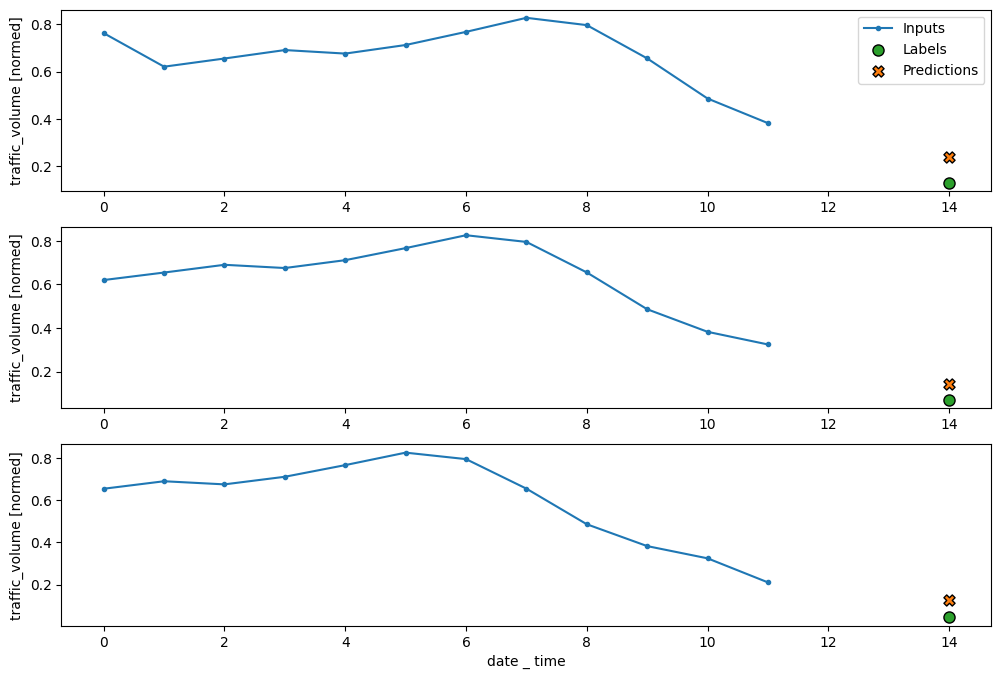

In [42]:
#Plotting the model
wide_window_12_1_3.plot(model_1)

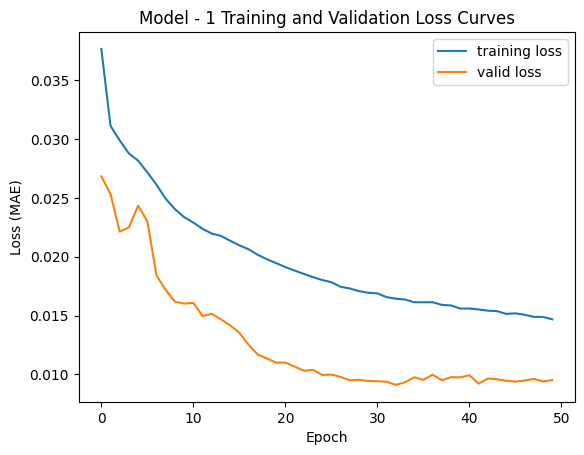

In [43]:
#Loss Plot
plt.plot(history_1.history['loss'], label='training loss') #Training Loss
plt.plot(history_1.history['val_loss'], label = 'valid loss') #Validation Loss
#X Label
plt.xlabel('Epoch')
#Y Label
plt.ylabel('Loss (MAE)')
plt.legend(loc='upper right')
#Title
plt.title('Model - 1 Training and Validation Loss Curves')
#Plotting the training and validation loss
plt.show()

Model - 2 : Adding Layers [WORST MODEL]

In [44]:
model_2=tf.keras.models.Sequential([
    tf.keras.layers.LSTM(240, return_sequences=True), #240 units in the LSTM Layer 
    tf.keras.layers.LSTM(240, return_sequences=True), #240 units in the LSTM Layer 
    tf.keras.layers.Dropout(0.2), #Adding a dropout layer
    tf.keras.layers.LSTM(128, return_sequences=True), #128 units in the LSTM Layer 
    tf.keras.layers.LSTM(128, return_sequences=True), #128 units in the LSTM Layer 
    tf.keras.layers.Dropout(0.2), #Another dropout layer is added
    tf.keras.layers.Dense(64, activation='relu'), #Creating a Dense Layer with 64 neurons and activation fn as the ReLU
    tf.keras.layers.Dense(32, activation='relu'), #Creating a Dense Layer with 32 neurons and activation fn as the ReLU
    tf.keras.layers.Dense(1), #Last dense layer 
    tf.keras.layers.Reshape([1, -1]), #important for window plotting
])

In [45]:
#Compiling and Evaluation of the Model
history_2 = compile_and_fit(model_2, wide_window_12_1_3)
perform_val['Model_2'] = model_2.evaluate(wide_window_12_1_3.val) #validation data is evaluated 
perform_test['Model_2'] = model_2.evaluate(wide_window_12_1_3.test, verbose=0) #test data is evaluated

Epoch 1/50
955/955 [==============================] - 68s 62ms/step - loss: 0.0405 - mean_absolute_error: 0.1517 - val_loss: 0.0238 - val_mean_absolute_error: 0.1129
Epoch 2/50
955/955 [==============================] - 50s 52ms/step - loss: 0.0358 - mean_absolute_error: 0.1410 - val_loss: 0.0278 - val_mean_absolute_error: 0.1257
Epoch 3/50
955/955 [==============================] - 48s 50ms/step - loss: 0.0353 - mean_absolute_error: 0.1392 - val_loss: 0.0361 - val_mean_absolute_error: 0.1447
Epoch 4/50
955/955 [==============================] - 46s 48ms/step - loss: 0.0345 - mean_absolute_error: 0.1376 - val_loss: 0.0343 - val_mean_absolute_error: 0.1427
Epoch 5/50
955/955 [==============================] - 45s 47ms/step - loss: 0.0360 - mean_absolute_error: 0.1399 - val_loss: 0.0333 - val_mean_absolute_error: 0.1395
Epoch 6/50
955/955 [==============================] - 46s 49ms/step - loss: 0.0349 - mean_absolute_error: 0.1374 - val_loss: 0.0423 - val_mean_absolute_error: 0.1606
Epoc

In [92]:
model_2.summary() #The summary of Adding Layers

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 12, 240)           254400    
                                                                 
 lstm_3 (LSTM)               (None, 12, 240)           461760    
                                                                 
 dropout_2 (Dropout)         (None, 12, 240)           0         
                                                                 
 lstm_4 (LSTM)               (None, 12, 128)           188928    
                                                                 
 lstm_5 (LSTM)               (None, 12, 128)           131584    
                                                                 
 dropout_3 (Dropout)         (None, 12, 128)           0         
                                                                 
 dense_3 (Dense)             (None, 12, 64)           

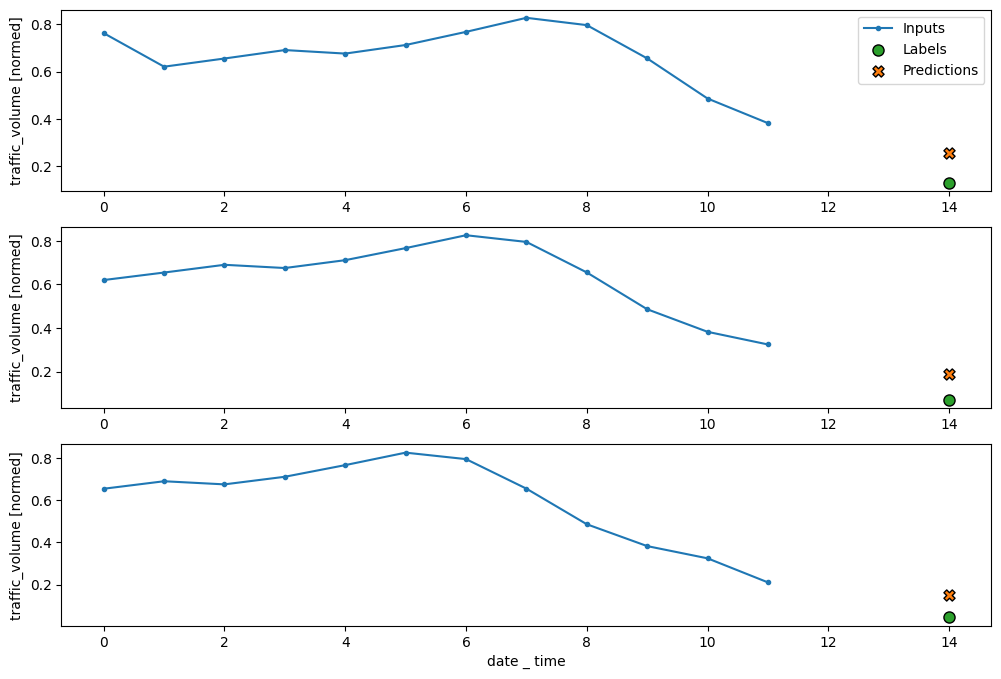

In [46]:
#Plotting the model
wide_window_12_1_3.plot(model_2)

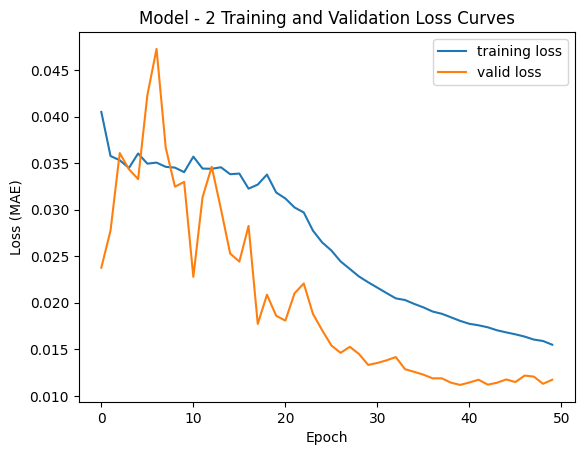

In [47]:
#Loss Plot
plt.plot(history_2.history['loss'], label='training loss') #training loss 
plt.plot(history_2.history['val_loss'], label = 'valid loss') #validation loss
#X Label
plt.xlabel('Epoch')
#Y Label
plt.ylabel('Loss (MAE)')
plt.legend(loc='upper right')
#Title
plt.title('Model - 2 Training and Validation Loss Curves')
#Plotting the training and validation loss
plt.show()

Model - 3 : Batch Normalization

In [48]:
model_3=tf.keras.models.Sequential([
    tf.keras.layers.LSTM(240, return_sequences=True), #240 units in the LSTM Layer 
    tf.keras.layers.LSTM(240, return_sequences=True), #240 units in the LSTM Layer 
    tf.keras.layers.BatchNormalization(), #Adding a Batch Normalization
    tf.keras.layers.Dropout(0.2), #Adding a dropout layer
    tf.keras.layers.LSTM(128, return_sequences=True), #128 units in the LSTM Layer 
    tf.keras.layers.LSTM(128, return_sequences=True), #128 units in the LSTM Layer 
    tf.keras.layers.BatchNormalization(), #Adding a Batch Normalization
    tf.keras.layers.Dropout(0.2), #Adding another dropout layer
    tf.keras.layers.LSTM(128, return_sequences=True), #128 units in the LSTM Layer 
    tf.keras.layers.LSTM(128, return_sequences=True), #128 units in the LSTM Layer 
    tf.keras.layers.BatchNormalization(), #Adding a Batch Normalization
    tf.keras.layers.Dropout(0.2), #Adding another dropout layer
    tf.keras.layers.Dense(64, activation='relu'), #Creating a Dense Layer with 64 neurons and activation fn as the ReLU
    tf.keras.layers.Dense(32, activation='relu'), #Creating a Dense Layer with 32 neurons and activation fn as the ReLU
    tf.keras.layers.Dense(1), #Last dense layer 
    tf.keras.layers.Reshape([1, -1]), #important for window plotting
])

In [49]:
#Compiling and Evaluation of the Model
history_3 = compile_and_fit(model_3, wide_window_12_1_3) 
perform_val['Model_3'] = model_3.evaluate(wide_window_12_1_3.val) #validation data is evaluated 
perform_test['Model_3'] = model_3.evaluate(wide_window_12_1_3.test, verbose=0) #test data is evaluated

Epoch 1/50
955/955 [==============================] - 74s 64ms/step - loss: 0.0506 - mean_absolute_error: 0.1679 - val_loss: 0.0204 - val_mean_absolute_error: 0.1040
Epoch 2/50
955/955 [==============================] - 57s 60ms/step - loss: 0.0345 - mean_absolute_error: 0.1369 - val_loss: 0.0187 - val_mean_absolute_error: 0.1014
Epoch 3/50
955/955 [==============================] - 59s 61ms/step - loss: 0.0287 - mean_absolute_error: 0.1213 - val_loss: 0.0189 - val_mean_absolute_error: 0.0970
Epoch 4/50
955/955 [==============================] - 60s 63ms/step - loss: 0.0295 - mean_absolute_error: 0.1228 - val_loss: 0.0222 - val_mean_absolute_error: 0.1126
Epoch 5/50
955/955 [==============================] - 58s 61ms/step - loss: 0.0255 - mean_absolute_error: 0.1117 - val_loss: 0.0193 - val_mean_absolute_error: 0.0962
Epoch 6/50
955/955 [==============================] - 57s 60ms/step - loss: 0.0222 - mean_absolute_error: 0.1017 - val_loss: 0.0201 - val_mean_absolute_error: 0.1001
Epoc

In [91]:
model_3.summary() #The summary of Batch Normalization

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 12, 240)           254400    
                                                                 
 lstm_7 (LSTM)               (None, 12, 240)           461760    
                                                                 
 batch_normalization (BatchN  (None, 12, 240)          960       
 ormalization)                                                   
                                                                 
 dropout_4 (Dropout)         (None, 12, 240)           0         
                                                                 
 lstm_8 (LSTM)               (None, 12, 128)           188928    
                                                                 
 lstm_9 (LSTM)               (None, 12, 128)           131584    
                                                      

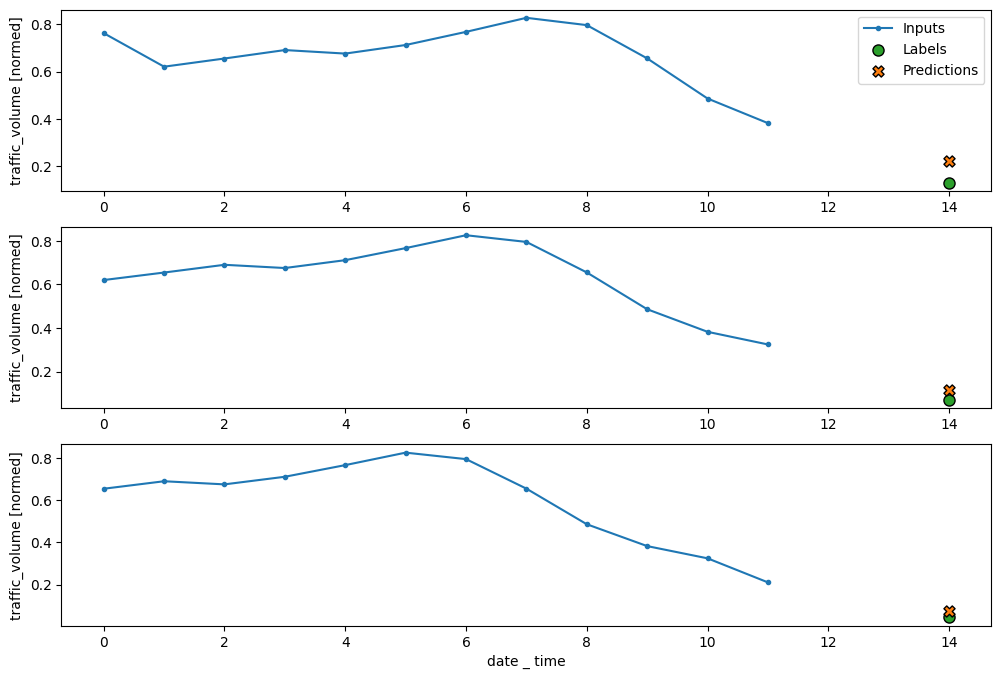

In [50]:
#Plotting the model
wide_window_12_1_3.plot(model_3)

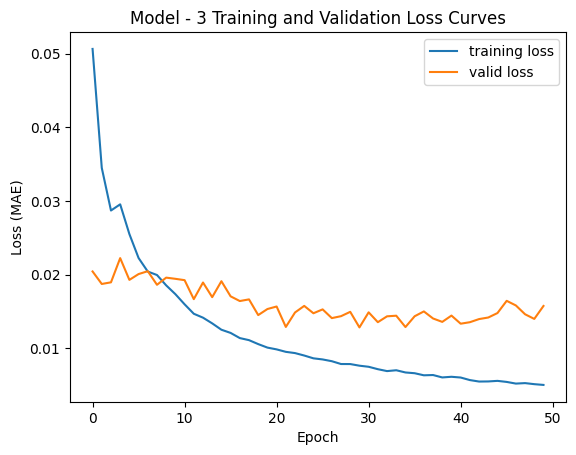

In [51]:
#Loss Plot
plt.plot(history_3.history['loss'], label='training loss') #training loss 
plt.plot(history_3.history['val_loss'], label = 'valid loss') #validation loss
#X Label
plt.xlabel('Epoch')
#Y Label
plt.ylabel('Loss (MAE)')
plt.legend(loc='upper right')
#Title
plt.title('Model - 3 Training and Validation Loss Curves')
#Plotting the training and validation loss
plt.show()

Model - 4 : Bidirectional RNNs [BEST MODEL]

In [52]:
model_4=tf.keras.models.Sequential([
    tf.keras.layers.Bidirectional(layers.LSTM(512, return_sequences=True,stateful=False)), #Bidirectional LSTM Layer
    tf.keras.layers.LSTM(128, return_sequences=True), #128 units in the LSTM Layer 
    tf.keras.layers.LSTM(128, return_sequences=True), #128 units in the LSTM Layer 
    tf.keras.layers.Dense(units=64, activation='relu'), #Creating a Dense Layer with 64 neurons and activation fn as the ReLU
    tf.keras.layers.Dense(32, activation='relu'), #Creating a Dense Layer with 32 neurons and activation fn as the ReLU
    tf.keras.layers.Dense(1), #Last dense layer 
    tf.keras.layers.Reshape([1, -1]), #important for window plotting
])

In [53]:
history_4 = compile_and_fit(model_4, wide_window_12_1_3)
perform_val['Model_4'] = model_4.evaluate(wide_window_12_1_3.val) #validation data is evaluated 
perform_test['Model_4'] = model_4.evaluate(wide_window_12_1_3.test, verbose=0) #test data is evaluated

Epoch 1/50
955/955 [==============================] - 93s 89ms/step - loss: 0.0276 - mean_absolute_error: 0.1188 - val_loss: 0.0194 - val_mean_absolute_error: 0.0996
Epoch 2/50
955/955 [==============================] - 89s 93ms/step - loss: 0.0229 - mean_absolute_error: 0.1076 - val_loss: 0.0190 - val_mean_absolute_error: 0.0958
Epoch 3/50
955/955 [==============================] - 85s 89ms/step - loss: 0.0207 - mean_absolute_error: 0.0995 - val_loss: 0.0175 - val_mean_absolute_error: 0.0907
Epoch 4/50
955/955 [==============================] - 85s 89ms/step - loss: 0.0178 - mean_absolute_error: 0.0901 - val_loss: 0.0120 - val_mean_absolute_error: 0.0715
Epoch 5/50
955/955 [==============================] - 85s 89ms/step - loss: 0.0158 - mean_absolute_error: 0.0835 - val_loss: 0.0093 - val_mean_absolute_error: 0.0605
Epoch 6/50
955/955 [==============================] - 85s 89ms/step - loss: 0.0140 - mean_absolute_error: 0.0772 - val_loss: 0.0117 - val_mean_absolute_error: 0.0679
Epoc

In [90]:
model_4.summary() #The summary of Bidirectional RNNs

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 12, 1024)         2199552   
 l)                                                              
                                                                 
 lstm_13 (LSTM)              (None, 12, 128)           590336    
                                                                 
 lstm_14 (LSTM)              (None, 12, 128)           131584    
                                                                 
 dense_9 (Dense)             (None, 12, 64)            8256      
                                                                 
 dense_10 (Dense)            (None, 12, 32)            2080      
                                                                 
 dense_11 (Dense)            (None, 12, 1)             33        
                                                      

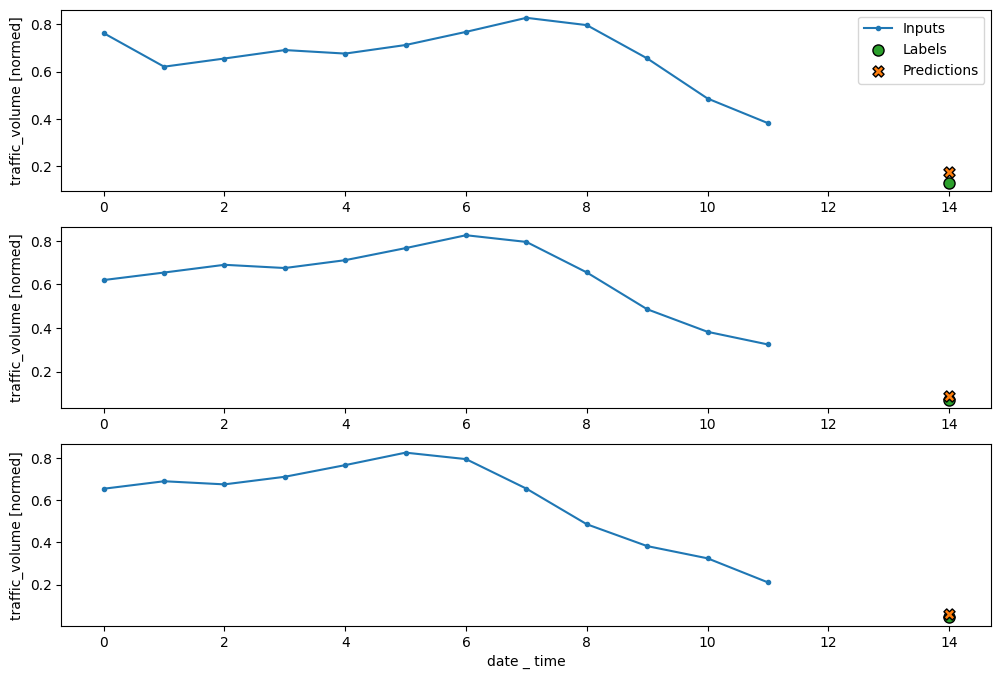

In [54]:
#Plotting the model
wide_window_12_1_3.plot(model_4)

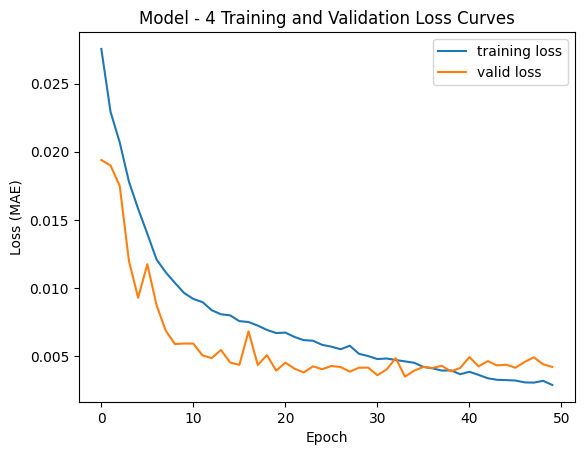

In [55]:
#Loss Plot
plt.plot(history_4.history['loss'], label='training loss') #training loss 
plt.plot(history_4.history['val_loss'], label = 'valid loss') #validation loss
#X Label
plt.xlabel('Epoch')
#Y Label
plt.ylabel('Loss (MAE)')
plt.legend(loc='upper right')
#Title
plt.title('Model - 4 Training and Validation Loss Curves')
#Plotting the training and validation loss
plt.show()

Model - 5 : Additional Bidirectional Layers

In [56]:
model_5=tf.keras.models.Sequential([
    tf.keras.layers.LSTM(240, return_sequences=True), #240 units in the LSTM Layer 
    tf.keras.layers.Bidirectional(layers.LSTM(240, return_sequences=True)), #Bidirectional LSTM Layer that has 240 units
    tf.keras.layers.Dropout(0.2), #Adding a dropout layer
    tf.keras.layers.LSTM(128, return_sequences=True), #128 units in the LSTM Layer 
    tf.keras.layers.Bidirectional(layers.LSTM(128, return_sequences=True)), #Bidirectional LSTM Layer that has 128 units
    tf.keras.layers.Dropout(0.2), #Adding another dropout layer
    tf.keras.layers.LSTM(128, return_sequences=True), #128 units in the LSTM Layer 
    tf.keras.layers.Bidirectional(layers.LSTM(128, return_sequences=True)), #Bidirectional LSTM Layer that has 128 units
    tf.keras.layers.Dropout(0.2), #Adding another dropout layer
    tf.keras.layers.Flatten(), #Flatten Layer
    tf.keras.layers.Dense(128, activation='relu'), #Creating a Dense Layer with 128 neurons and activation fn as the ReLU
    tf.keras.layers.BatchNormalization(), #Adding another BatchNormalization Layer 
    tf.keras.layers.Dense(64, activation='relu'), #Creating a Dense Layer with 64 neurons and activation fn as the ReLU
    tf.keras.layers.BatchNormalization(),  #Adding another BatchNormalization Layer 
    tf.keras.layers.Dense(32, activation='relu'), #Creating a Dense Layer with 32 neurons and activation fn as the ReLU
    tf.keras.layers.BatchNormalization(),  #Adding another BatchNormalization Layer 
    tf.keras.layers.Dense(1), #Last dense layer 
    tf.keras.layers.Reshape([1, -1]), #important for window plotting
])

In [57]:
#Compiling and Evaluation of the Model
history_5 = compile_and_fit(model_5, wide_window_12_1_3) 
perform_val['Model_5'] = model_5.evaluate(wide_window_12_1_3.val) #validation data is evaluated 
perform_test['Model_5'] = model_5.evaluate(wide_window_12_1_3.test, verbose=0) #test data is evaluated

Epoch 1/50
955/955 [==============================] - 113s 101ms/step - loss: 0.0614 - mean_absolute_error: 0.1621 - val_loss: 0.0240 - val_mean_absolute_error: 0.1174
Epoch 2/50
955/955 [==============================] - 93s 98ms/step - loss: 0.0432 - mean_absolute_error: 0.1483 - val_loss: 0.0187 - val_mean_absolute_error: 0.0975
Epoch 3/50
955/955 [==============================] - 85s 89ms/step - loss: 0.0408 - mean_absolute_error: 0.1493 - val_loss: 0.0272 - val_mean_absolute_error: 0.1306
Epoch 4/50
955/955 [==============================] - 86s 90ms/step - loss: 0.0362 - mean_absolute_error: 0.1440 - val_loss: 0.0441 - val_mean_absolute_error: 0.1602
Epoch 5/50
955/955 [==============================] - 84s 88ms/step - loss: 0.0344 - mean_absolute_error: 0.1380 - val_loss: 0.0215 - val_mean_absolute_error: 0.1059
Epoch 6/50
955/955 [==============================] - 83s 87ms/step - loss: 0.0264 - mean_absolute_error: 0.1200 - val_loss: 0.0198 - val_mean_absolute_error: 0.1049
Ep

In [89]:
model_5.summary() #The summary of Additional Bidirectional Layers

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 12, 240)           254400    
                                                                 
 bidirectional_1 (Bidirectio  (None, 12, 480)          923520    
 nal)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 12, 480)           0         
                                                                 
 lstm_17 (LSTM)              (None, 12, 128)           311808    
                                                                 
 bidirectional_2 (Bidirectio  (None, 12, 256)          263168    
 nal)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 12, 256)          

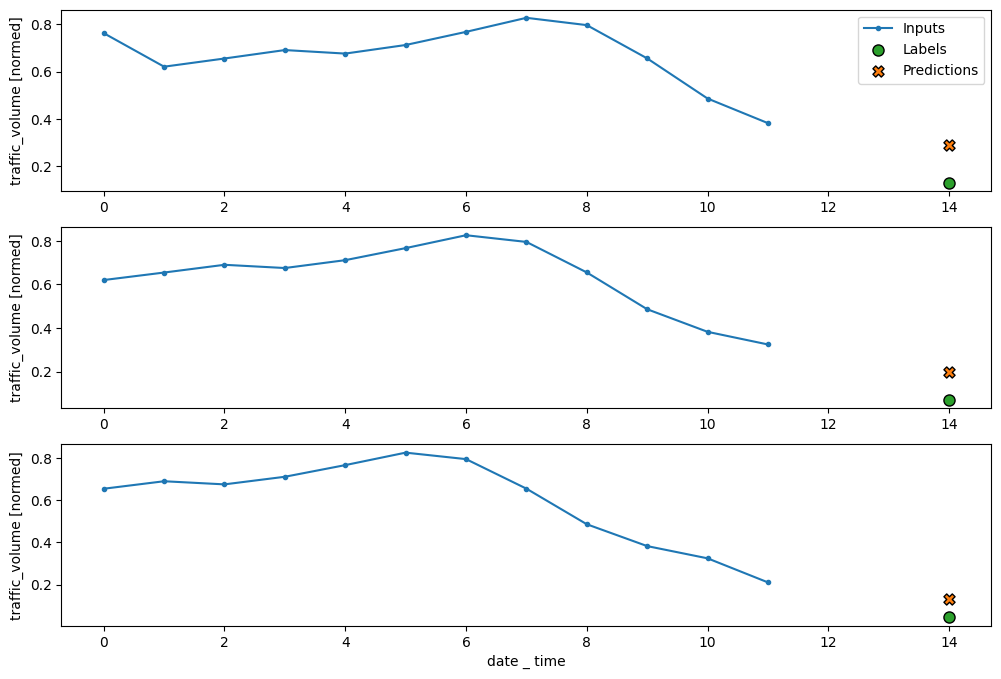

In [58]:
#Plotting the Model
wide_window_12_1_3.plot(model_5)

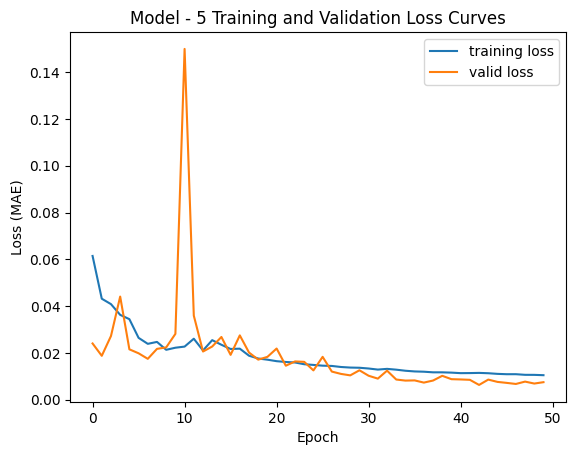

In [59]:
#Loss Plot
plt.plot(history_5.history['loss'], label='training loss') #training loss 
plt.plot(history_5.history['val_loss'], label = 'valid loss') #validation loss
#X Label
plt.xlabel('Epoch')
#Y Label
plt.ylabel('Loss (MAE)')
plt.legend(loc='upper right')
#Title
plt.title('Model - 5 Training and Validation Loss Curves')
#Plotting the training and validation loss
plt.show()

Model 6 : RNN and CNN Model

In [60]:
model_6=tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(256, kernel_size=3, padding='same',activation='relu'), #adding a 256 units for the convolutional layer with ReLU and 3 padding is set
    tf.keras.layers.Conv1D(128, kernel_size=3, padding='same',activation='relu'), #adding a 128 units for the convolutional layer with ReLU and 3 padding is set
    tf.keras.layers.Dropout(0.2), #Adding a dropout layer
    tf.keras.layers.LSTM(240, return_sequences=True),  #240 units in the LSTM Layer 
    tf.keras.layers.LSTM(240, return_sequences=True),  #240 units in the LSTM Layer 
    tf.keras.layers.Dropout(0.2), #Adding another dropout layer
    tf.keras.layers.LSTM(128, return_sequences=True), #128 units in the LSTM Layer 
    tf.keras.layers.LSTM(128, return_sequences=True), #128 units in the LSTM Layer 
    tf.keras.layers.Dropout(0.2), #Adding another dropout layer
    tf.keras.layers.Dense(64, activation='relu'), #Creating a Dense Layer with 64 neurons and activation fn as the ReLU
    tf.keras.layers.Dense(32, activation='relu'), #Creating a Dense Layer with 32 neurons and activation fn as the ReLU
    tf.keras.layers.Dense(1), #Last dense layer 
    tf.keras.layers.Reshape([1, -1]), #important for window plotting
])

In [61]:
#Compiling and Evaluation of the Model
history_6 = compile_and_fit(model_6, wide_window_12_1_3)
perform_val['Model_5'] = model_6.evaluate(wide_window_12_1_3.val) #validation data is evaluated 
perform_test['Model_5'] = model_6.evaluate(wide_window_12_1_3.test, verbose=0) #test data is evaluated

Epoch 1/50
955/955 [==============================] - 57s 51ms/step - loss: 0.0386 - mean_absolute_error: 0.1458 - val_loss: 0.0244 - val_mean_absolute_error: 0.1128
Epoch 2/50
955/955 [==============================] - 46s 48ms/step - loss: 0.0321 - mean_absolute_error: 0.1309 - val_loss: 0.0288 - val_mean_absolute_error: 0.1262
Epoch 3/50
955/955 [==============================] - 44s 46ms/step - loss: 0.0305 - mean_absolute_error: 0.1269 - val_loss: 0.0276 - val_mean_absolute_error: 0.1225
Epoch 4/50
955/955 [==============================] - 45s 47ms/step - loss: 0.0294 - mean_absolute_error: 0.1242 - val_loss: 0.0224 - val_mean_absolute_error: 0.1051
Epoch 5/50
955/955 [==============================] - 45s 47ms/step - loss: 0.0276 - mean_absolute_error: 0.1184 - val_loss: 0.0174 - val_mean_absolute_error: 0.0892
Epoch 6/50
955/955 [==============================] - 44s 47ms/step - loss: 0.0260 - mean_absolute_error: 0.1130 - val_loss: 0.0185 - val_mean_absolute_error: 0.0951
Epoc

In [87]:
model_6.summary() #The summary of RNN and CNN Model

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 12, 256)           18688     
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 128)           98432     
                                                                 
 dropout_10 (Dropout)        (None, 12, 128)           0         
                                                                 
 lstm_21 (LSTM)              (None, 12, 240)           354240    
                                                                 
 lstm_22 (LSTM)              (None, 12, 240)           461760    
                                                                 
 dropout_11 (Dropout)        (None, 12, 240)           0         
                                                                 
 lstm_23 (LSTM)              (None, 12, 128)          

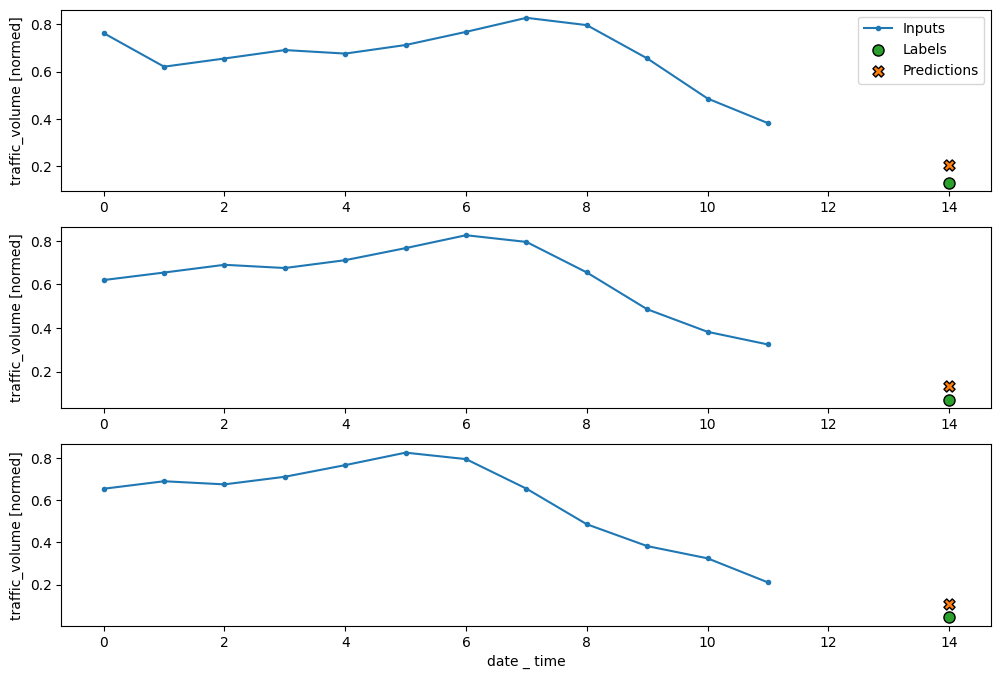

In [62]:
#Plotting the Model
wide_window_12_1_3.plot(model_6)

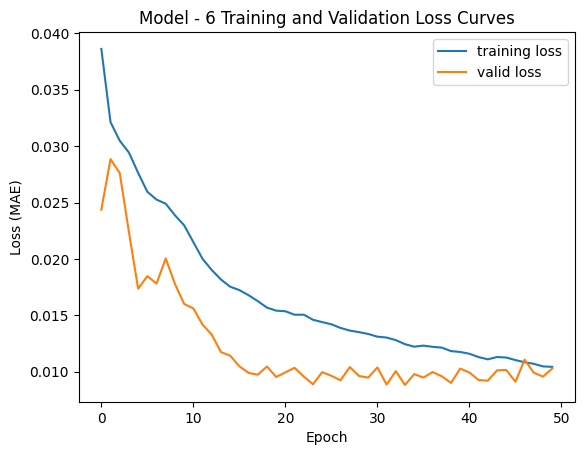

In [63]:
#Loss Plot
plt.plot(history_6.history['loss'], label='training loss') #training loss 
plt.plot(history_6.history['val_loss'], label = 'valid loss') #validation loss
plt.xlabel('Epoch')
plt.ylabel('Loss (MAE)')
plt.legend(loc='upper right')
plt.title('Model - 6 Training and Validation Loss Curves')
plt.show()

Denormalizing the Data

In [64]:
tar_col = Metro_Inter['traffic_volume']
min_value = tar_col.min() #minimum value
max_value = tar_col.max() #maximum value 
print(min_value) #the minimum value is printed
print(max_value) #the maximum value is printed

0
7280


In [79]:
results=model_4.predict(wide_window_12_1_3.test) #prediction of the model
results = results.squeeze() #results are displayed in 2D
print(len(results)) 
predict_DF = pd.DataFrame(results) 
print(predict_DF) #The obtained frame gets printed
index = np.array(test_Metro_Inter.index) #The test data is indexed
index = np.delete(index, slice(0,14), axis=0) #slicing is done
predict_DF['id'] = index #The index is set to ID as mentioned 
predict_DF = predict_DF.rename({0: 'prediction'}, axis=1) #prediction is set as the column name
predict_DF = predict_DF.reindex(columns=['id','prediction']) #The output shows the id and prediction as the column names
predict_DF['prediction'] = predict_DF['prediction'].astype(float)
predict_DF.head()
preds = predict_DF.prediction.values.tolist() #The values are converted into a list
new_preds = [] #An empty list is created
for z in range(0, len(preds)):
  ans = preds[z] * (max_value - min_value)  + min_value #denormalizing the predictions using minmax
  new_preds.append(ans) #appending the answer to the list created
predict_DF['prediction'] = new_preds #printing the prediction 
predict_DF['prediction'] = predict_DF['prediction'].astype(float) #converting it to the float
predict_DF.to_csv(r'C:/Users/admin/Downloads/predict.csv', index=False) #converting into a csv file and saving to the specified location

156/156 [==============================] - 4s 25ms/step
4986
            0         1         2         3         4         5         6   \
0     0.625404  0.626408  0.616102  0.602670  0.607367  0.594595  0.600093   
1     0.671792  0.677397  0.673961  0.682410  0.674450  0.659372  0.658238   
2     0.722844  0.725215  0.742870  0.741890  0.734210  0.759929  0.767944   
3     0.829798  0.848008  0.877144  0.874789  0.891229  0.908705  0.908365   
4     0.795783  0.812603  0.835149  0.831488  0.823878  0.834102  0.841788   
...        ...       ...       ...       ...       ...       ...       ...   
4981  0.483637  0.498395  0.489558  0.483130  0.481752  0.487317  0.492305   
4982  0.421444  0.420918  0.425856  0.429347  0.434223  0.438310  0.445221   
4983  0.379309  0.389019  0.362933  0.367430  0.339821  0.332484  0.339483   
4984  0.273012  0.295246  0.263952  0.250882  0.249441  0.253262  0.258107   
4985  0.257826  0.247343  0.223165  0.208815  0.216437  0.203046  0.209104   

  

In [80]:
print(new_preds) #The predictions are printed 

[4552.941122055054, 4890.642509460449, 5262.306089401245, 6040.9258460998535, 5793.29794883728, 4329.835014343262, 2987.148575782776, 2536.233298778534, 2450.6519842147827, 2049.968581199646, 973.8970482349396, 653.1815844774246, 613.9779961109161, 334.1382384300232, 567.216140627861, 1248.2795882225037, 2907.5896620750427, 5733.654527664185, 6341.9391441345215, 6038.997497558594, 5083.237838745117, 4472.695960998535, 5072.496538162231, 5194.639453887939, 5199.07413482666, 5686.331014633179, 6150.96321105957, 6658.929443359375, 6187.876071929932, 4813.799295425415, 3613.1460976600647, 3200.1759815216064, 2952.2139644622803, 2543.4973669052124, 1951.140501499176, 669.3333476781845, 372.00746297836304, 345.446240901947, 462.7958935499191, 1250.5025696754456, 2946.737220287323, 5824.03263092041, 6398.670949935913, 6053.368988037109, 5101.098928451538, 4676.412706375122, 4834.889631271362, 5019.204864501953, 5205.239295959473, 5695.746250152588, 6119.006605148315, 6402.485990524292, 5895.5

In [81]:
print(predict_DF) #The final output gets printed

         id   prediction
0     35589  4552.941122
1     35590  4890.642509
2     35591  5262.306089
3     35592  6040.925846
4     35593  5793.297949
...     ...          ...
4981  40570  3520.878699
4982  40571  3068.110142
4983  40572  2761.369293
4984  40573  1987.530053
4985  40574  1876.971331

[4986 rows x 2 columns]


Calculating the MAE

In [82]:
#Predicting the MAE with the given formula
def mean_absolute_error(target, predicted): #MAE
    number = 4986 #Results
    sum = 0 #sum=0
    for i in range(number):
        sum += abs(target - predicted)
    error = sum/number #MAE average
    return error #MAE is returned

In [83]:
test_data=data_viz[35589:] #using the copied data and getting the test set
test_data.drop(['holiday',    'temp',  'rain_1h',  'snow_1h',  'clouds_all' 
                ,'weather_main','weather_description'],axis =1,inplace=True ) #unnecessary variables are being removed
test_data.reset_index(inplace=True)
test_data.columns = test_data.columns.str.replace('index', 'id') #index is replaced with id
pred_values = predict_DF.merge(test_data, on='id',how='left')
print(pred_values) #The final predictions are printed

         id   prediction  traffic_volume
0     35589  4552.941122            4166
1     35590  4890.642509            4671
2     35591  5262.306089            5260
3     35592  6040.925846            6420
4     35593  5793.297949            5874
...     ...          ...             ...
4981  40570  3520.878699            3543
4982  40571  3068.110142            2781
4983  40572  2761.369293            2159
4984  40573  1987.530053            1450
4985  40574  1876.971331             954

[4986 rows x 3 columns]


In [84]:
data_col = pred_values['traffic_volume'] #target variable 
original = data_col.to_frame().traffic_volume.to_list() #target is changed into a list
preds_col = pred_values['prediction']
answers = preds_col.to_frame().prediction.to_list()
mae = [] #An empty list is created
for z in range(0, len(pred_values)):
  ans = mean_absolute_error(original[z],answers[z]) #MAE is called
  mae.append(ans) #List gets appended to it

In [85]:
Sum = sum(mae) #All the answers are added in the list
val = Sum/ 4986
print(val) #Printing the MAE value

247.04637607414466
